In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
gold_data_model = pd.read_excel('Gold_data.xlsx', header=0, index_col=0,parse_dates=True)
gold_data_model

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


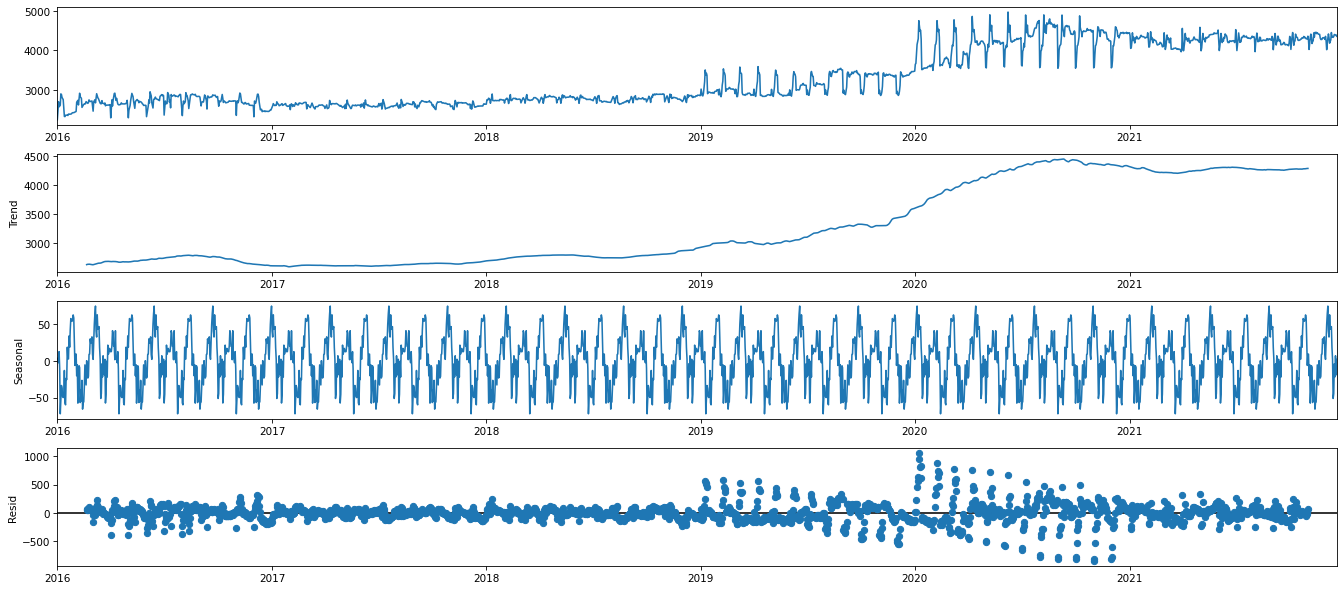

In [ ]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(gold_data_model, model='additive', period=100)
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

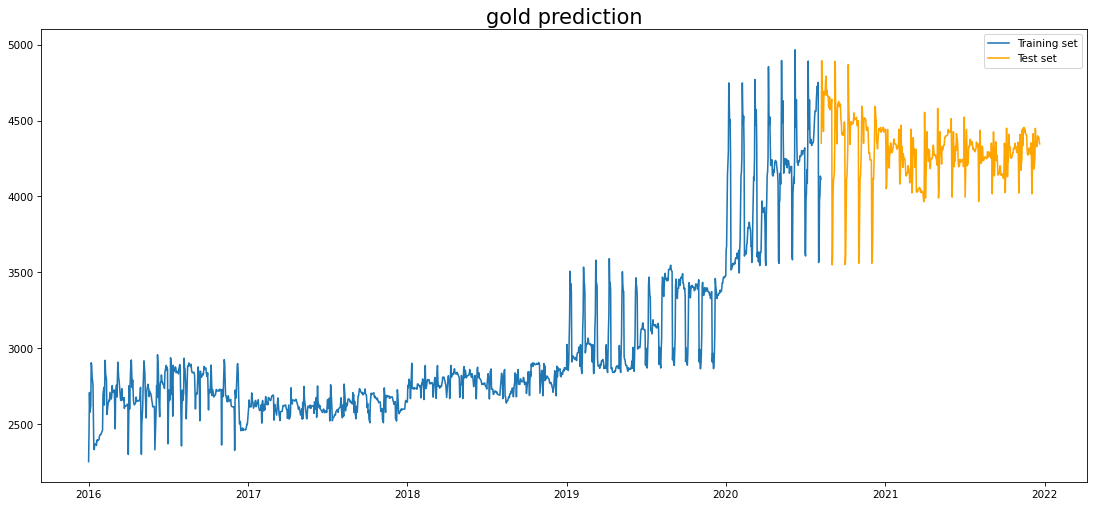

In [ ]:
test_size = round(2182*0.23)

gold_data_model_train = gold_data_model[:-test_size]
gold_data_model_test = gold_data_model[-test_size:]

plt.title('gold prediction', size=20)
plt.plot(gold_data_model_train, label='Training set')
plt.plot(gold_data_model_test, label='Test set', color='orange')
plt.legend()

In [ ]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.1)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = sm.tsa.arima.ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rms

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

After grid search with p, d, q, I found ARIMA order (1,1,1) giving less RMSE

p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(gold_data_model.values, p_values, d_values, q_values)

In [ ]:
model = sm.tsa.arima.ARIMA(gold_data_model_train, order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1680
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10199.617
Date:                Mon, 05 Dec 2022   AIC                          20405.233
Time:                        08:54:28   BIC                          20421.511
Sample:                    01-01-2016   HQIC                         20411.263
                         - 08-06-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6404      0.107     -5.998      0.000      -0.850      -0.431
ma.L1          0.7061      0.102      6.932      0.000       0.506       0.906
sigma2      1.105e+04    112.091     98.569      0.000    1.08e+04    1.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.53   Jarque-Bera (JB):             36385.58
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               3.62   Skew:                            -1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = list()
history = [x for x in gold_data_model_train.values]
for t in range(len(gold_data_model_train)):
    model = sm.tsa.arima.ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(gold_data_model_train.values[t])

rmse = sqrt(mean_squared_error(gold_data_model_train, predictions))
print(rmse)

114.24845044602576


In [ ]:
gold_data_model_test

,price
date,
2020-08-07,4351.7
2020-08-08,4894.1
2020-08-09,4571.2
2020-08-10,4455.9
2020-08-11,4636.1
...,...
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5


In [ ]:
model = sm.tsa.arima.ARIMA(gold_data_model_train, order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


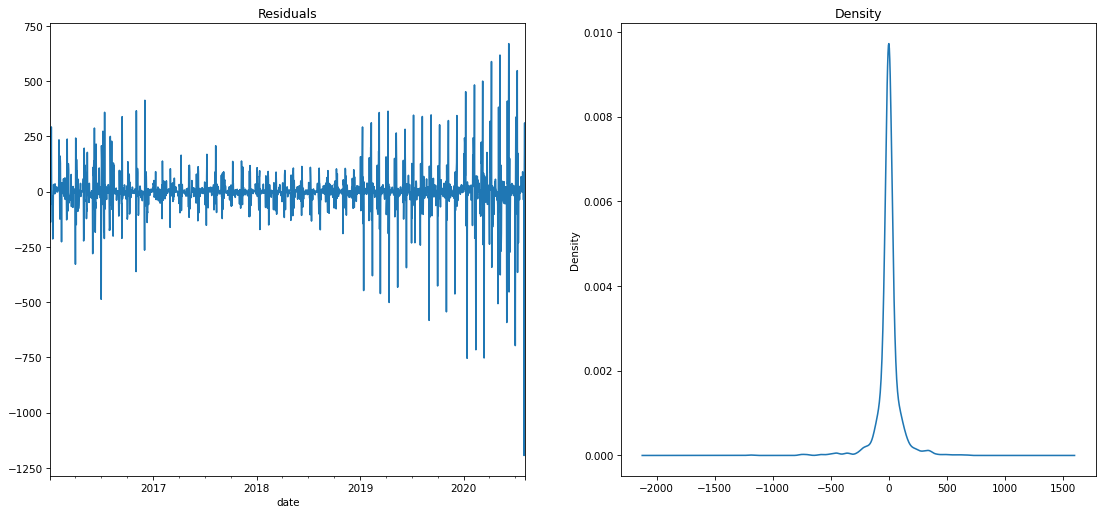

In [ ]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

The residuals look random in general, and their density looks normally distributed with a mean of around 0

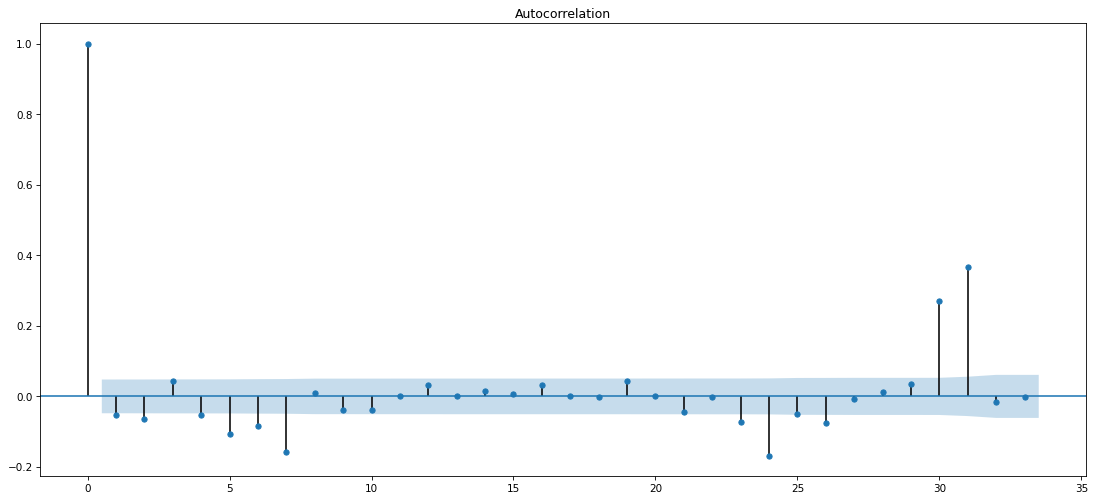

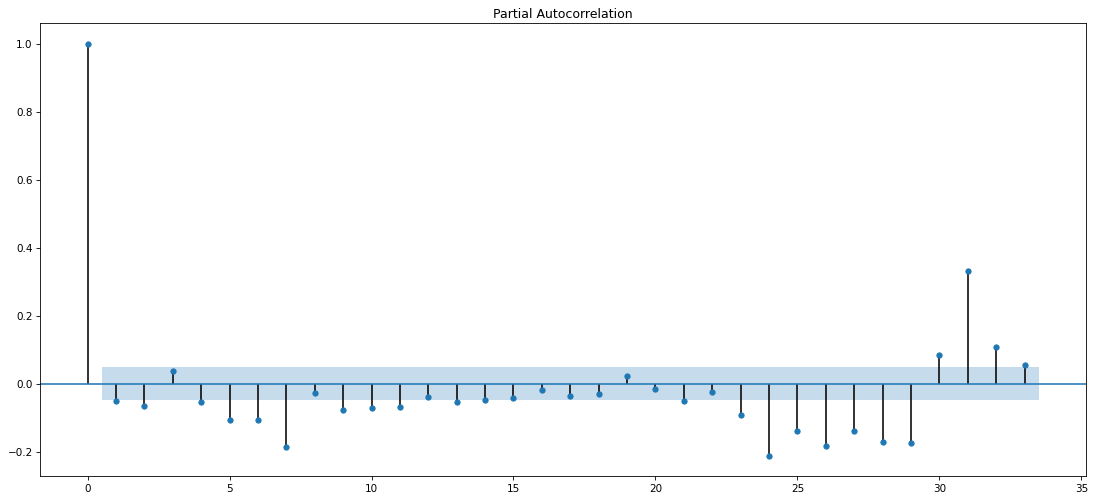

In [ ]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

In [ ]:
test_predictions = list()
history1 = [x for x in gold_data_model_test.values]
for t in range(len(gold_data_model_test)):
    model = sm.tsa.arima.ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    test_predictions.append(yhat)
    history1.append(gold_data_model_test.values[t])

rmse = sqrt(mean_squared_error(gold_data_model_test, test_predictions))
print(rmse)

268.8910702617454


In [ ]:
gold_data_model

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [ ]:
gold_data_model_train["Forecast"]=predictions[0:1680]
gold_data_model_train

<ipython-input-19-794db0df6065>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data_model_train["Forecast"]=predictions[0:1680]


,price,Forecast
date,,
2016-01-01,2252.60,4112.597313
2016-01-02,2454.50,2122.855303
2016-01-03,2708.10,2526.821558
2016-01-04,2577.80,2667.221413
2016-01-05,2597.75,2598.982437
...,...,...
2020-08-02,3605.00,3488.111456
2020-08-03,3977.10,3658.218190
2020-08-04,4011.80,3960.730861


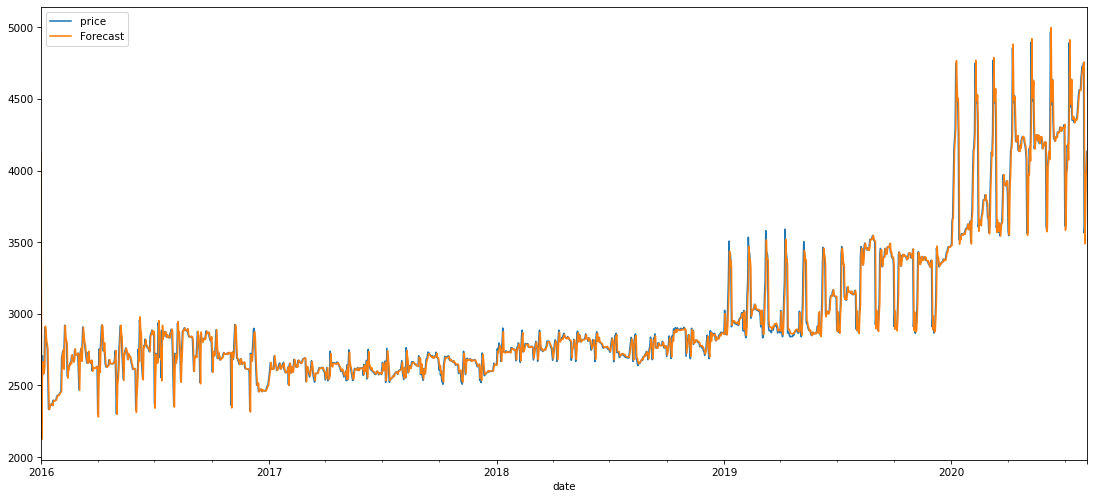

In [ ]:
gold_data_model_train.plot()

In [ ]:
import math
from math import sqrt

In [ ]:
mse = ((gold_data_model_train["Forecast"] - gold_data_model_train['price']) ** 2).mean()

In [ ]:
rmse=sqrt(mse)
rmse

114.24845044602576

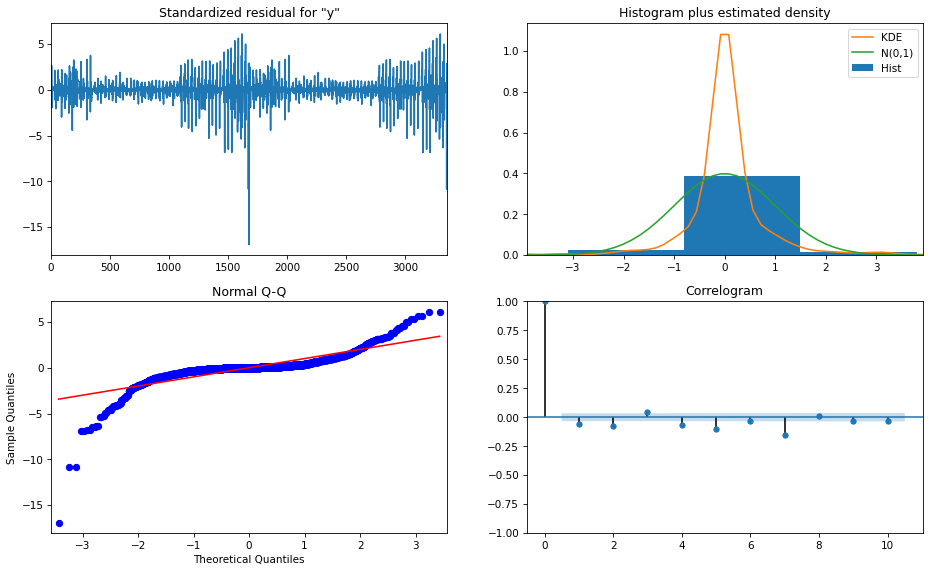

In [ ]:
model_fit.plot_diagnostics(figsize=(15,9))
plt.show()

AttributeError: ignored

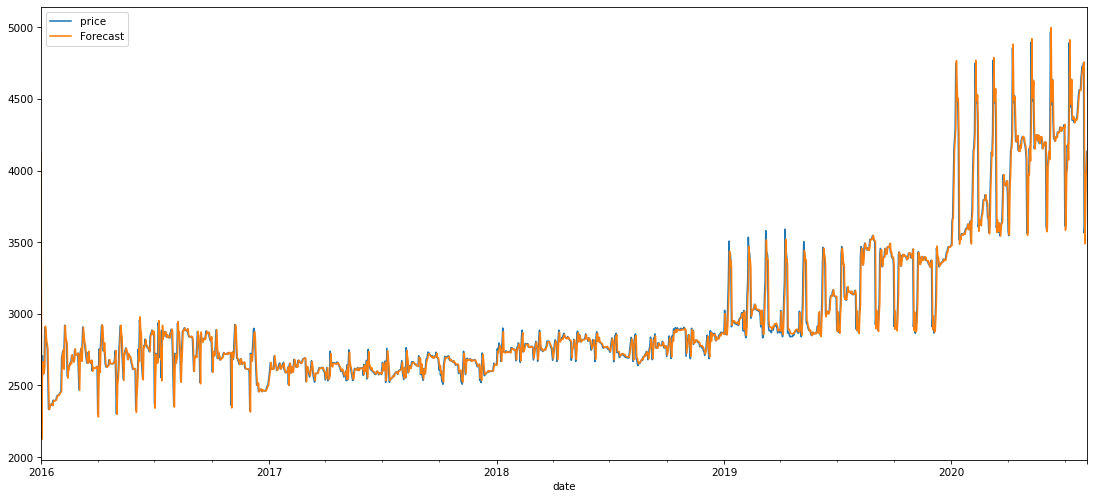

In [ ]:
gold_data_model_train.plot()
forecast_30.plot()


In [ ]:
forecast_30=model_fit.predict(start=2182,end=2213,dynamic=True)
forecast_30

array([2538.07145716, 2537.58353356, 2537.89213066, 2537.69695222,
       2537.82039675, 2537.74232177, 2537.79170186, 2537.76047043,
       2537.78022338, 2537.76773023, 2537.77563177, 2537.77063428,
       2537.77379504, 2537.77179596, 2537.77306032, 2537.77226065,
       2537.77276642, 2537.77244653, 2537.77264885, 2537.77252089,
       2537.77260182, 2537.77255063, 2537.77258301, 2537.77256253,
       2537.77257548, 2537.77256729, 2537.77257247, 2537.7725692 ,
       2537.77257127, 2537.77256996, 2537.77257079, 2537.77257026])

In [ ]:
gold_data_model_train["Forecast"]=predictions[0:2182]
gold_data_model_train

<ipython-input-27-da88077ad3ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data_model_train["Forecast"]=predictions[0:2182]


,price,Forecast
date,,
2016-01-01,2252.60,4112.597313
2016-01-02,2454.50,2122.855303
2016-01-03,2708.10,2526.821558
2016-01-04,2577.80,2667.221413
2016-01-05,2597.75,2598.982437
...,...,...
2020-08-02,3605.00,3488.111456
2020-08-03,3977.10,3658.218190
2020-08-04,4011.80,3960.730861
